In [62]:
import pandas as pd
from pathlib import Path
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [38]:
data = fetch_ucirepo(id=144)

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

In [70]:
def handle_statlog_german_credit_data(statlog_german_credit_data):
    """
    Transform Statlog German Credit dataset into a pandas DataFrame.

    Parameters:
    - statlog_german_credit_data: object
        The Statlog German Credit dataset object containing features, targets, and variable descriptions.

    Returns:
    - data: pandas DataFrame
        The dataset as a pandas DataFrame with appropriate column names based on variable descriptions.
    """
    # Extract features and targets
    X = statlog_german_credit_data.data.features
    y = statlog_german_credit_data.data.targets
    
    # Extract variable names and descriptions
    vars = statlog_german_credit_data.variables
    cols_map = dict(vars[['name', 'description']].values)
    
    # Combine features and targets into a DataFrame
    data = pd.concat([X, y], axis=1)
    
    # Rename columns based on variable descriptions
    data.rename(columns=cols_map, inplace=True)
    
    return data

def determine_variable_type(df, ratio_threshold=0.05):
    """
    Determine whether each column in the DataFrame contains discrete or continuous variables.

    Parameters:
    - df: pandas DataFrame
        The dataset to analyze.
    - ratio_threshold: float, optional (default=0.05)
        The threshold ratio to determine whether a variable is discrete or continuous.

    Returns:
    - variable_types: dict
        A dictionary where keys are column names and values are the variable types (Discrete or Continuous).
    """
    variable_types = {}
    for column in df.columns:
        unique_values = df[column].nunique()
        total_values = len(df[column])
        ratio = unique_values / total_values
        if ratio < ratio_threshold:
            variable_type = 'Discrete'
            summary = describe_discrete_variable(df[column])
            # Plot the value counts if the variable is discrete
            fig = plot_categorical_variable_counts(df, column, title=f'{column} Distribution', ylabel='Frequency')
            plt.show()
            # Print summary statistics for discrete variables
            print(f"Column: {column}")
            print(f"Variable type: {variable_type}")
            print("Summary:")
            print(f"    Unique values: {summary['unique_values']}")
            print("    Value counts:")
            for value, count in summary['value_counts'].items():
                print(f"        {value}: {count}")
            print("\n----------------------\n")
        else:
            variable_type = 'Continuous'
            summary = describe_continuous_variable(df[column])
            # Print summary statistics for continuous variables
            print(f"Column: {column}")
            print(f"Variable type: {variable_type}")
            print("Summary:")
            print(f"    Mean: {summary['mean']}")
            print(f"    Median: {summary['median']}")
            print(f"    Standard deviation: {summary['std_dev']}")
            print(f"    Minimum: {summary['min']}")
            print(f"    Maximum: {summary['max']}")
            print("\n----------------------\n")
        
        variable_types[column] = variable_type
        
    return variable_types


def describe_discrete_variable(series):
    """
    Describe a discrete variable.

    Parameters:
    - series: pandas Series
        The column to analyze.

    Returns:
    - summary: dict
        A dictionary containing the summary of the discrete variable.
    """
    unique_values = series.nunique()
    summary = {
        'type': 'Discrete',
        'unique_values': unique_values,
        'value_counts': series.value_counts().to_dict()
    }
    return summary

def describe_continuous_variable(series):
    """
    Describe a continuous variable.

    Parameters:
    - series: pandas Series
        The column to analyze.

    Returns:
    - summary: dict
        A dictionary containing the summary of the continuous variable.
    """
    summary = {
        'type': 'Continuous',
        'mean': series.mean(),
        'median': series.median(),
        'std_dev': series.std(),
        'min': series.min(),
        'max': series.max()
    }
    return summary


def plot_categorical_variable_counts(data, column_name, title=None, ylabel=None):
    """
    Plot the percentage counts of a categorical variable as a bar plot.

    Parameters:
    - data: pandas DataFrame
        The dataset containing the variable to plot.
    - column_name: str
        The name of the column containing the categorical variable.
    - title: str, optional
        The title of the plot.
    - ylabel: str, optional
        The label for the y-axis.

    Returns:
    - fig: matplotlib Figure
        The plotted figure.
    """
    total_count = len(data[column_name])
    counts = data[column_name].value_counts(normalize=True) * 100  # Calculate percentage counts
    fig = counts.plot.bar()
    fig.axhline(y=5, color='red')
    if title:
        fig.set_title(title)
    if ylabel:
        fig.set_ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    # Adjust layout to prevent overlapping labels
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, f'{count:.1f}%', ha='center', va='bottom')  # Add percentage labels
    return fig

In [40]:
ip_data = handle_statlog_german_credit_data(
    statlog_german_credit_data
)

<Axes: title={'center': 'counts'}, xlabel='Duration', ylabel='Duration'>

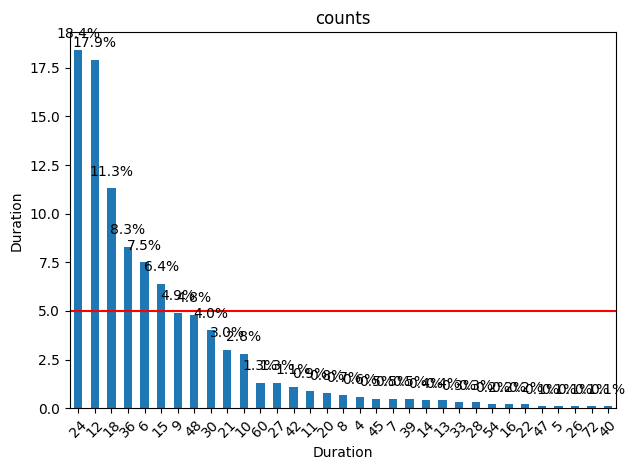

In [72]:
plot_categorical_variable_counts(
    ip_data,
    'Duration',
    'counts',
    'Duration'
)

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(df.index, df[var], rotation=90)

ax2 = ax.twinx()
ax.bar(df.index, df["perc_houses"], color='lightgrey')
ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
ax.axhline(y=0.05, color='red')
ax.set_ylabel('percentage of houses per category')
ax.set_xlabel(var)
ax2.set_ylabel('Average Sale Price per category')
plt.show()

In [49]:
ip_data.head(2)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,"1 = Good, 2 = Bad"
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [50]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration                                                  1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

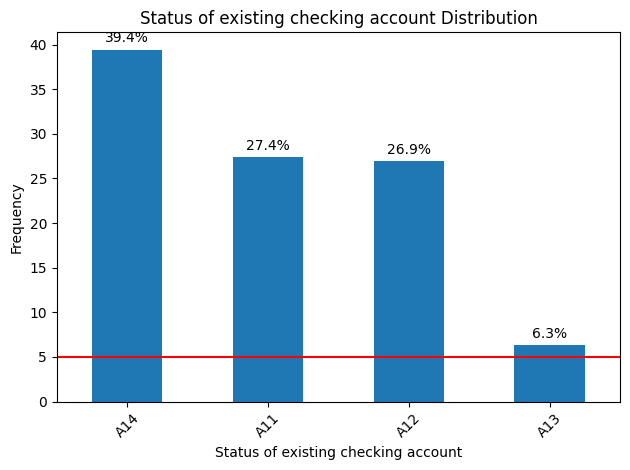

Column: Status of existing checking account
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        A14: 394
        A11: 274
        A12: 269
        A13: 63

----------------------



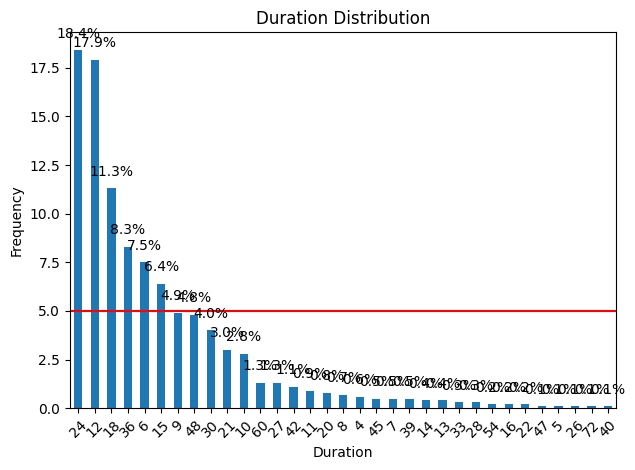

Column: Duration
Variable type: Discrete
Summary:
    Unique values: 33
    Value counts:
        24: 184
        12: 179
        18: 113
        36: 83
        6: 75
        15: 64
        9: 49
        48: 48
        30: 40
        21: 30
        10: 28
        60: 13
        27: 13
        42: 11
        11: 9
        20: 8
        8: 7
        4: 6
        45: 5
        7: 5
        39: 5
        14: 4
        13: 4
        33: 3
        28: 3
        54: 2
        16: 2
        22: 2
        47: 1
        5: 1
        26: 1
        72: 1
        40: 1

----------------------



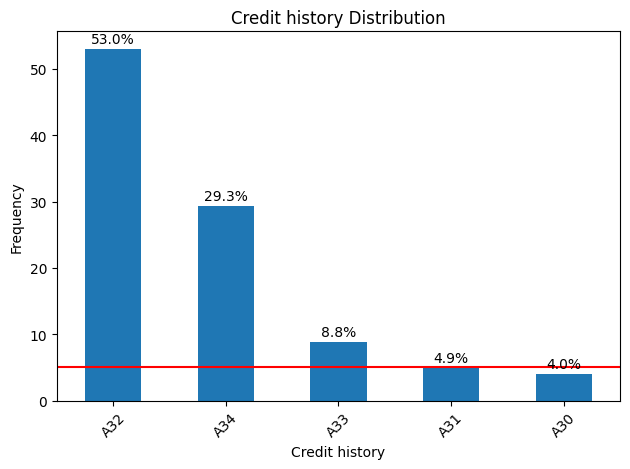

Column: Credit history
Variable type: Discrete
Summary:
    Unique values: 5
    Value counts:
        A32: 530
        A34: 293
        A33: 88
        A31: 49
        A30: 40

----------------------



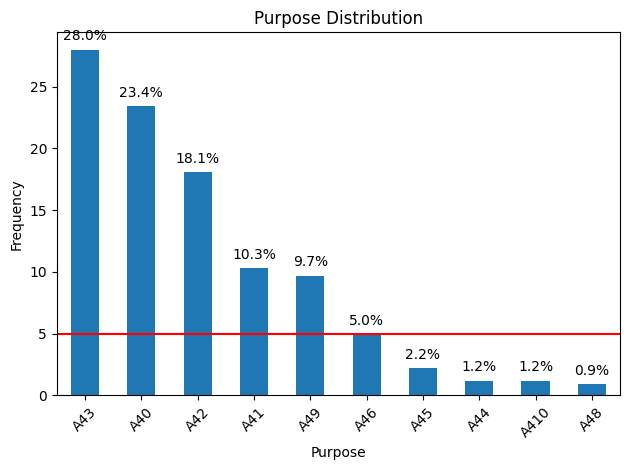

Column: Purpose
Variable type: Discrete
Summary:
    Unique values: 10
    Value counts:
        A43: 280
        A40: 234
        A42: 181
        A41: 103
        A49: 97
        A46: 50
        A45: 22
        A44: 12
        A410: 12
        A48: 9

----------------------

Column: Credit amount
Variable type: Continuous
Summary:
    Mean: 3271.258
    Median: 2319.5
    Standard deviation: 2822.7368759604406
    Minimum: 250
    Maximum: 18424

----------------------



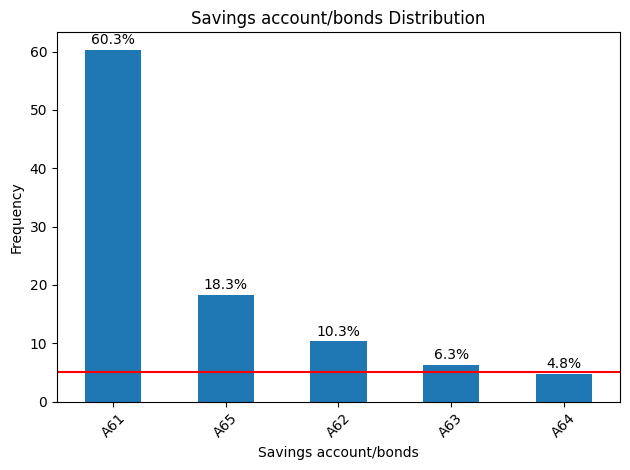

Column: Savings account/bonds
Variable type: Discrete
Summary:
    Unique values: 5
    Value counts:
        A61: 603
        A65: 183
        A62: 103
        A63: 63
        A64: 48

----------------------



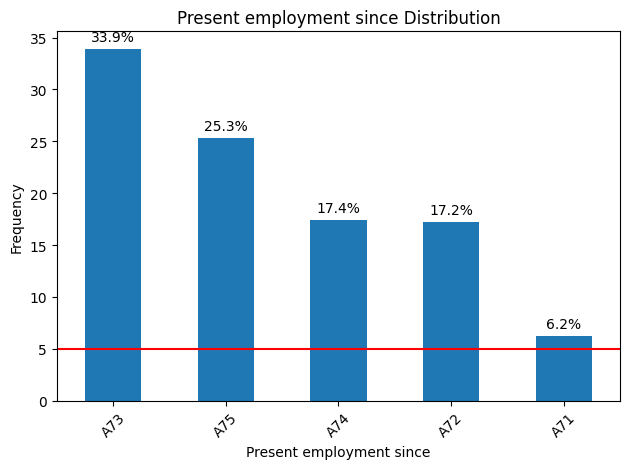

Column: Present employment since
Variable type: Discrete
Summary:
    Unique values: 5
    Value counts:
        A73: 339
        A75: 253
        A74: 174
        A72: 172
        A71: 62

----------------------



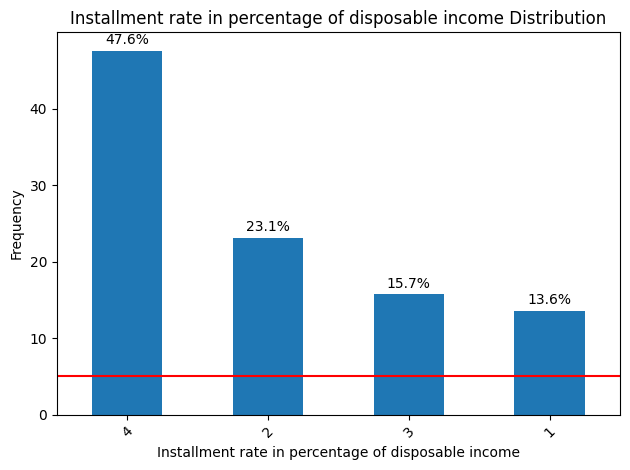

Column: Installment rate in percentage of disposable income
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        4: 476
        2: 231
        3: 157
        1: 136

----------------------



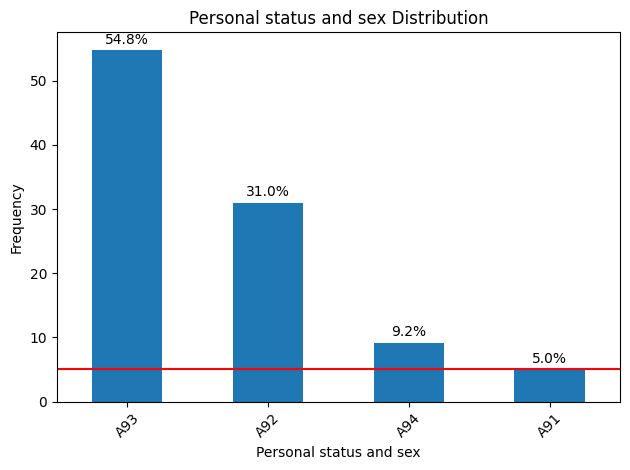

Column: Personal status and sex
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        A93: 548
        A92: 310
        A94: 92
        A91: 50

----------------------



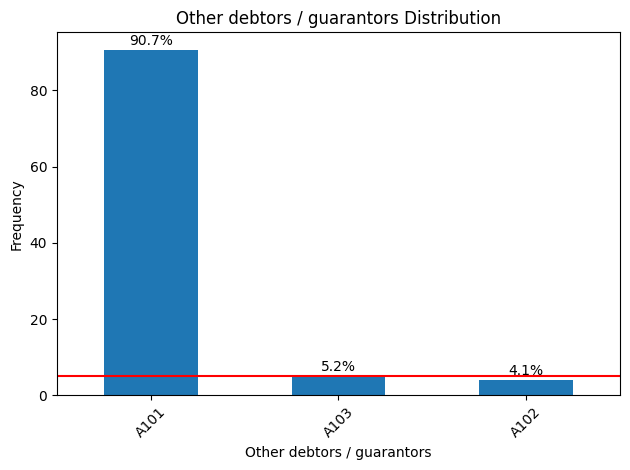

Column: Other debtors / guarantors
Variable type: Discrete
Summary:
    Unique values: 3
    Value counts:
        A101: 907
        A103: 52
        A102: 41

----------------------



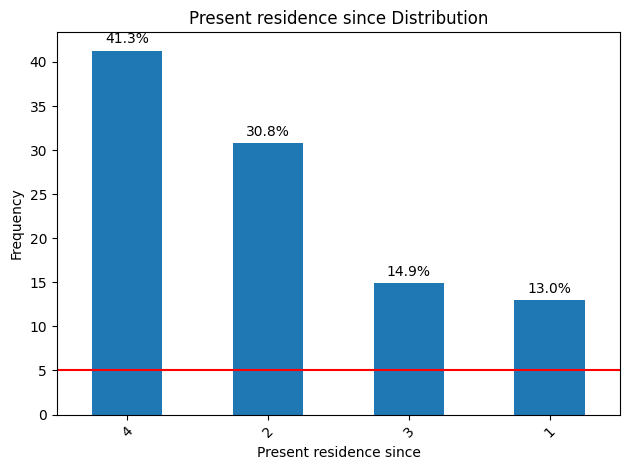

Column: Present residence since
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        4: 413
        2: 308
        3: 149
        1: 130

----------------------



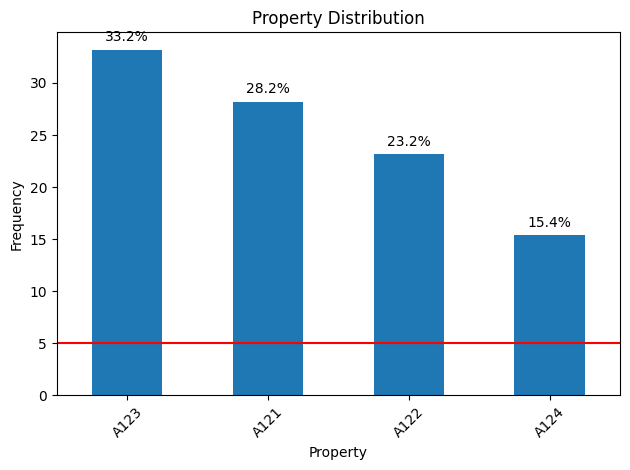

Column: Property
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        A123: 332
        A121: 282
        A122: 232
        A124: 154

----------------------

Column: Age
Variable type: Continuous
Summary:
    Mean: 35.546
    Median: 33.0
    Standard deviation: 11.375468574317512
    Minimum: 19
    Maximum: 75

----------------------



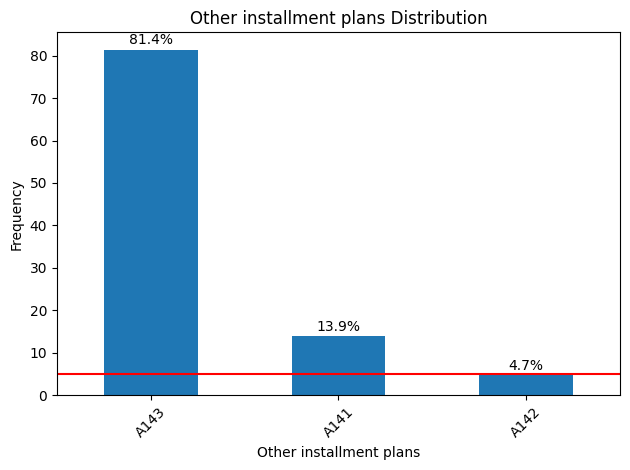

Column: Other installment plans
Variable type: Discrete
Summary:
    Unique values: 3
    Value counts:
        A143: 814
        A141: 139
        A142: 47

----------------------



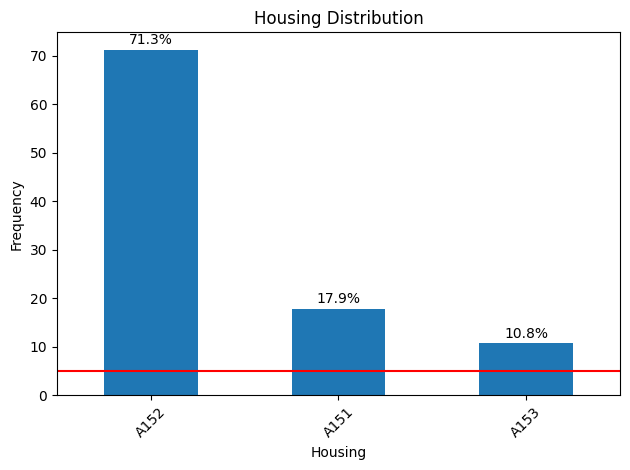

Column: Housing
Variable type: Discrete
Summary:
    Unique values: 3
    Value counts:
        A152: 713
        A151: 179
        A153: 108

----------------------



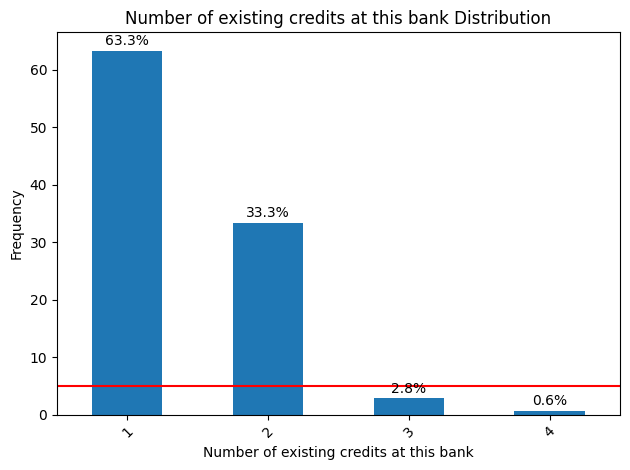

Column: Number of existing credits at this bank
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        1: 633
        2: 333
        3: 28
        4: 6

----------------------



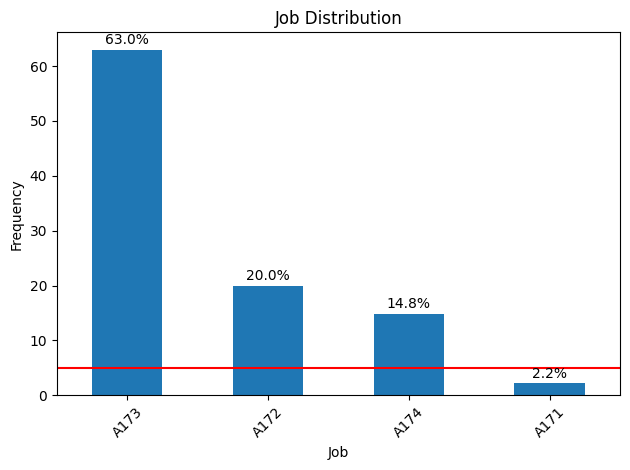

Column: Job
Variable type: Discrete
Summary:
    Unique values: 4
    Value counts:
        A173: 630
        A172: 200
        A174: 148
        A171: 22

----------------------



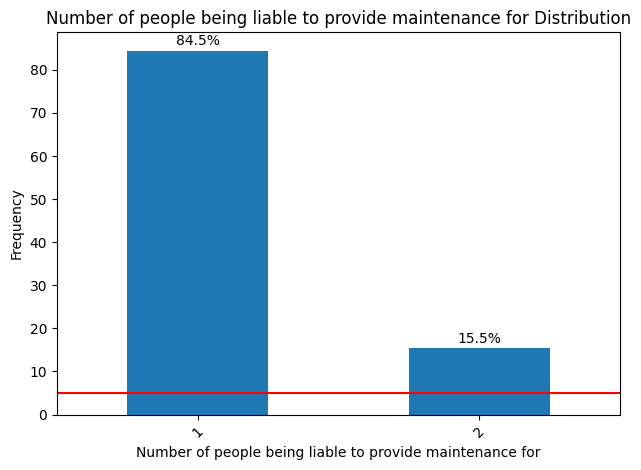

Column: Number of people being liable to provide maintenance for
Variable type: Discrete
Summary:
    Unique values: 2
    Value counts:
        1: 845
        2: 155

----------------------



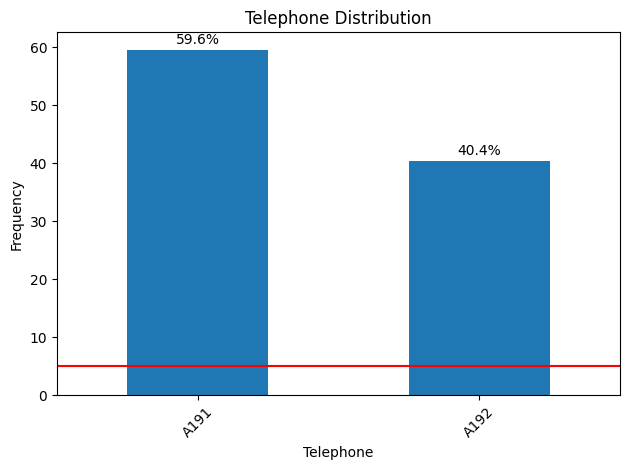

Column: Telephone
Variable type: Discrete
Summary:
    Unique values: 2
    Value counts:
        A191: 596
        A192: 404

----------------------



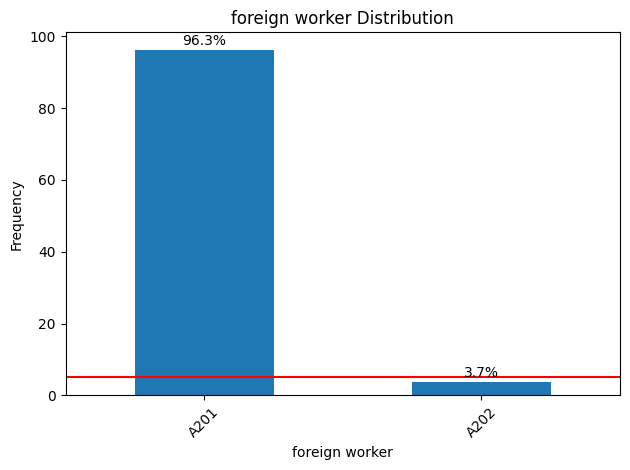

Column: foreign worker
Variable type: Discrete
Summary:
    Unique values: 2
    Value counts:
        A201: 963
        A202: 37

----------------------



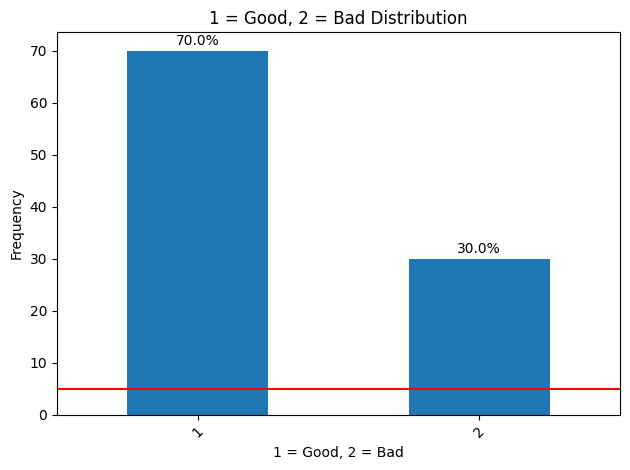

Column: 1 = Good, 2 = Bad
Variable type: Discrete
Summary:
    Unique values: 2
    Value counts:
        1: 700
        2: 300

----------------------



{'Status of existing checking account': 'Discrete',
 'Duration': 'Discrete',
 'Credit history': 'Discrete',
 'Purpose': 'Discrete',
 'Credit amount': 'Continuous',
 'Savings account/bonds': 'Discrete',
 'Present employment since': 'Discrete',
 'Installment rate in percentage of disposable income': 'Discrete',
 'Personal status and sex': 'Discrete',
 'Other debtors / guarantors': 'Discrete',
 'Present residence since': 'Discrete',
 'Property': 'Discrete',
 'Age': 'Continuous',
 'Other installment plans': 'Discrete',
 'Housing': 'Discrete',
 'Number of existing credits at this bank': 'Discrete',
 'Job': 'Discrete',
 'Number of people being liable to provide maintenance for': 'Discrete',
 'Telephone': 'Discrete',
 'foreign worker': 'Discrete',
 '1 = Good, 2 = Bad': 'Discrete'}

In [71]:
determine_variable_type(
    df=ip_data
)

# need to handle variables:
    - Duration : numeric type 
    - Purpose : treatment for rare labels.
    